In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import seml
import seaborn as sns
from poisson_atac.utils import model_type_map
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [15]:
fig_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/new_plots/'

In [16]:
dataset_map = {'neurips': 'Neurips\nall batches', 'hematopoiesis': 'Satpathy\net al.', 'satpathy': 'Satpathy\net al.'}

In [51]:
def load_embedding(ex):
    # Latent space evaluation:
    if ex.model_type == 'scale':
        adata = sc.read(ex.embedding_path)
        X_emb = adata.obsm['latent']
    else:
        X_emb = pd.read_csv(ex.embedding_path, index_col=0).values
    return X_emb

# Plot embeddings

In [17]:
import scanpy as sc
sc.settings.figdir = fig_path

In [66]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=False,
                      color_map="YlGnBu_r",format='pdf', transparent=False, #YlGnBu_r
                    ipython_format='png2x', figsize=(8,8))

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [19]:
from poisson_atac.utils import load_experiment, compute_embedding

In [20]:
#import get_experiment function from seml run
from poisson_atac.experiments.benchmark.experiment_runner import get_experiment

In [42]:
seml_database = 'integration_benchmark'
results = seml.get_results(seml_database, to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"])

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [43]:
results['config.data.dataset'] = results['config.data.dataset'].map(dataset_map)
results['config.model.model_type'] = results['config.model.model_type'].map(model_type_map)

In [44]:
results = results.set_index(['config.data.dataset', 'config.model.model_type'])

## Neurips

### CisTopic model

In [69]:
model_type='cistopic'

In [70]:
model_hash=results.loc[(dataset_map['neurips'], model_type_map[model_type]), "config_hash"]

In [71]:
model_hash

'd1a146b10e6af58e94ee8b4b6b0d0bd2'

In [72]:
ex, model, config = load_experiment(seml_database, model_hash, get_experiment, load_model=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


In [73]:
X_emb = load_embedding(ex)

In [74]:
compute_embedding(ex.adata, X_emb)

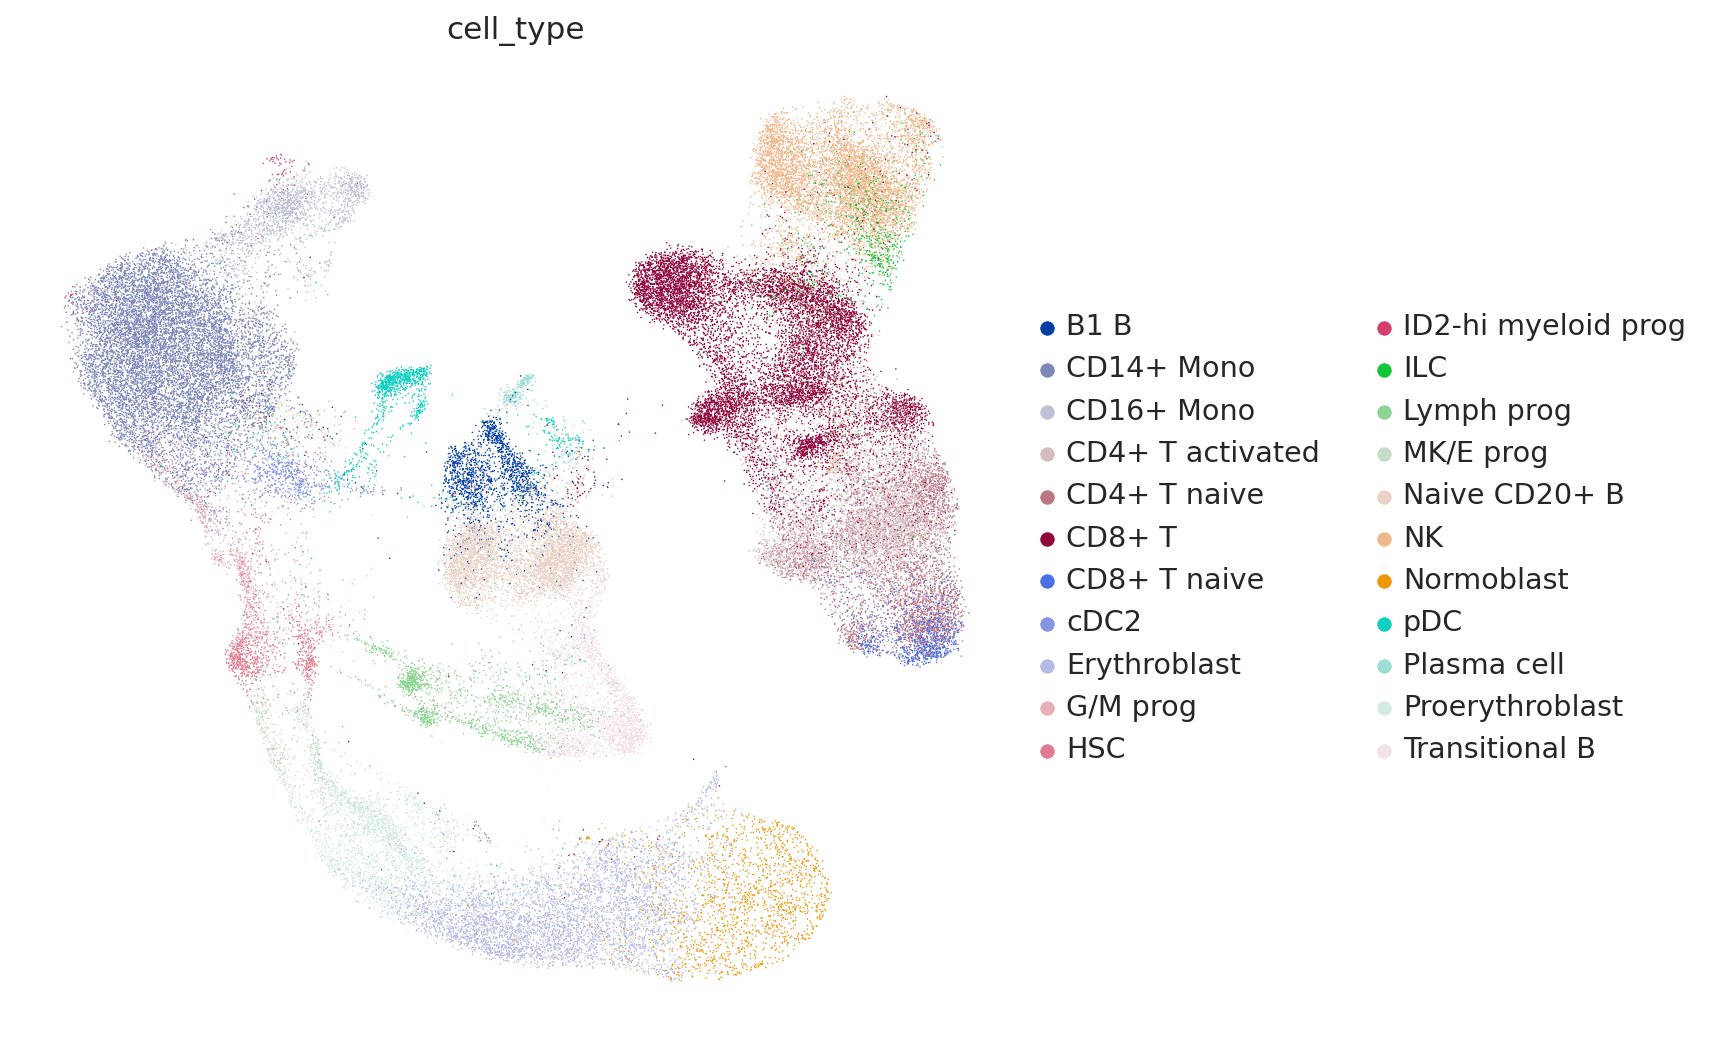

In [75]:
sc.pl.umap(ex.adata, color="cell_type", save=f"{model_type}.png")

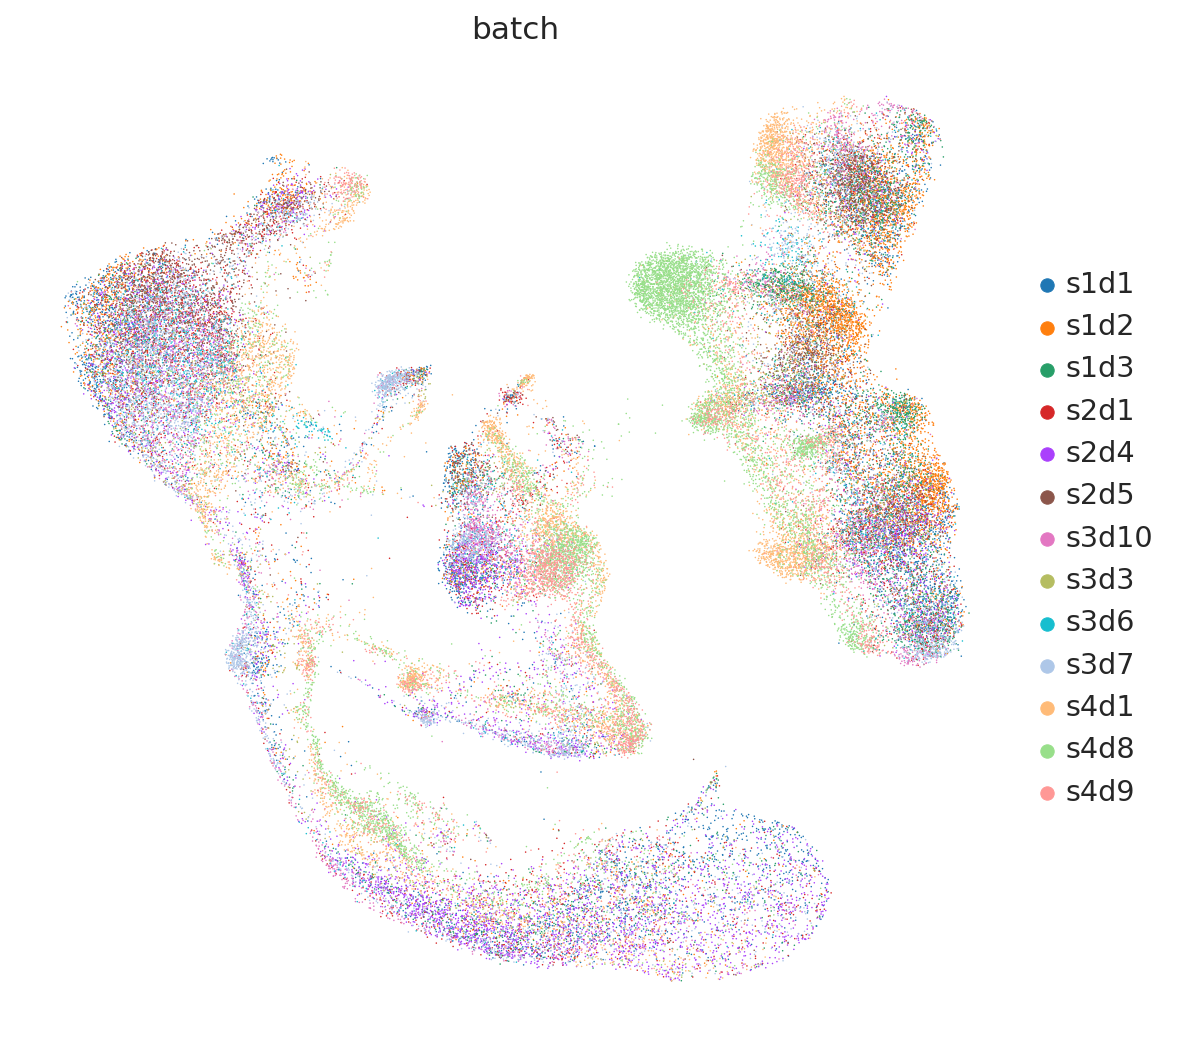

In [76]:
sc.pl.umap(ex.adata, color="batch", save=f"{model_type}_batch.png")

### Signac model

In [77]:
model_type='signac'
model_hash=results.loc[(dataset_map['neurips'], model_type_map[model_type]), "config_hash"]

In [78]:
model_hash

'a20bc673895daf7f873e745f3cb9d358'

In [79]:
ex, model, config = load_experiment(seml_database, model_hash, get_experiment, load_model=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


In [80]:
X_emb = load_embedding(ex)

In [81]:
compute_embedding(ex.adata, X_emb)

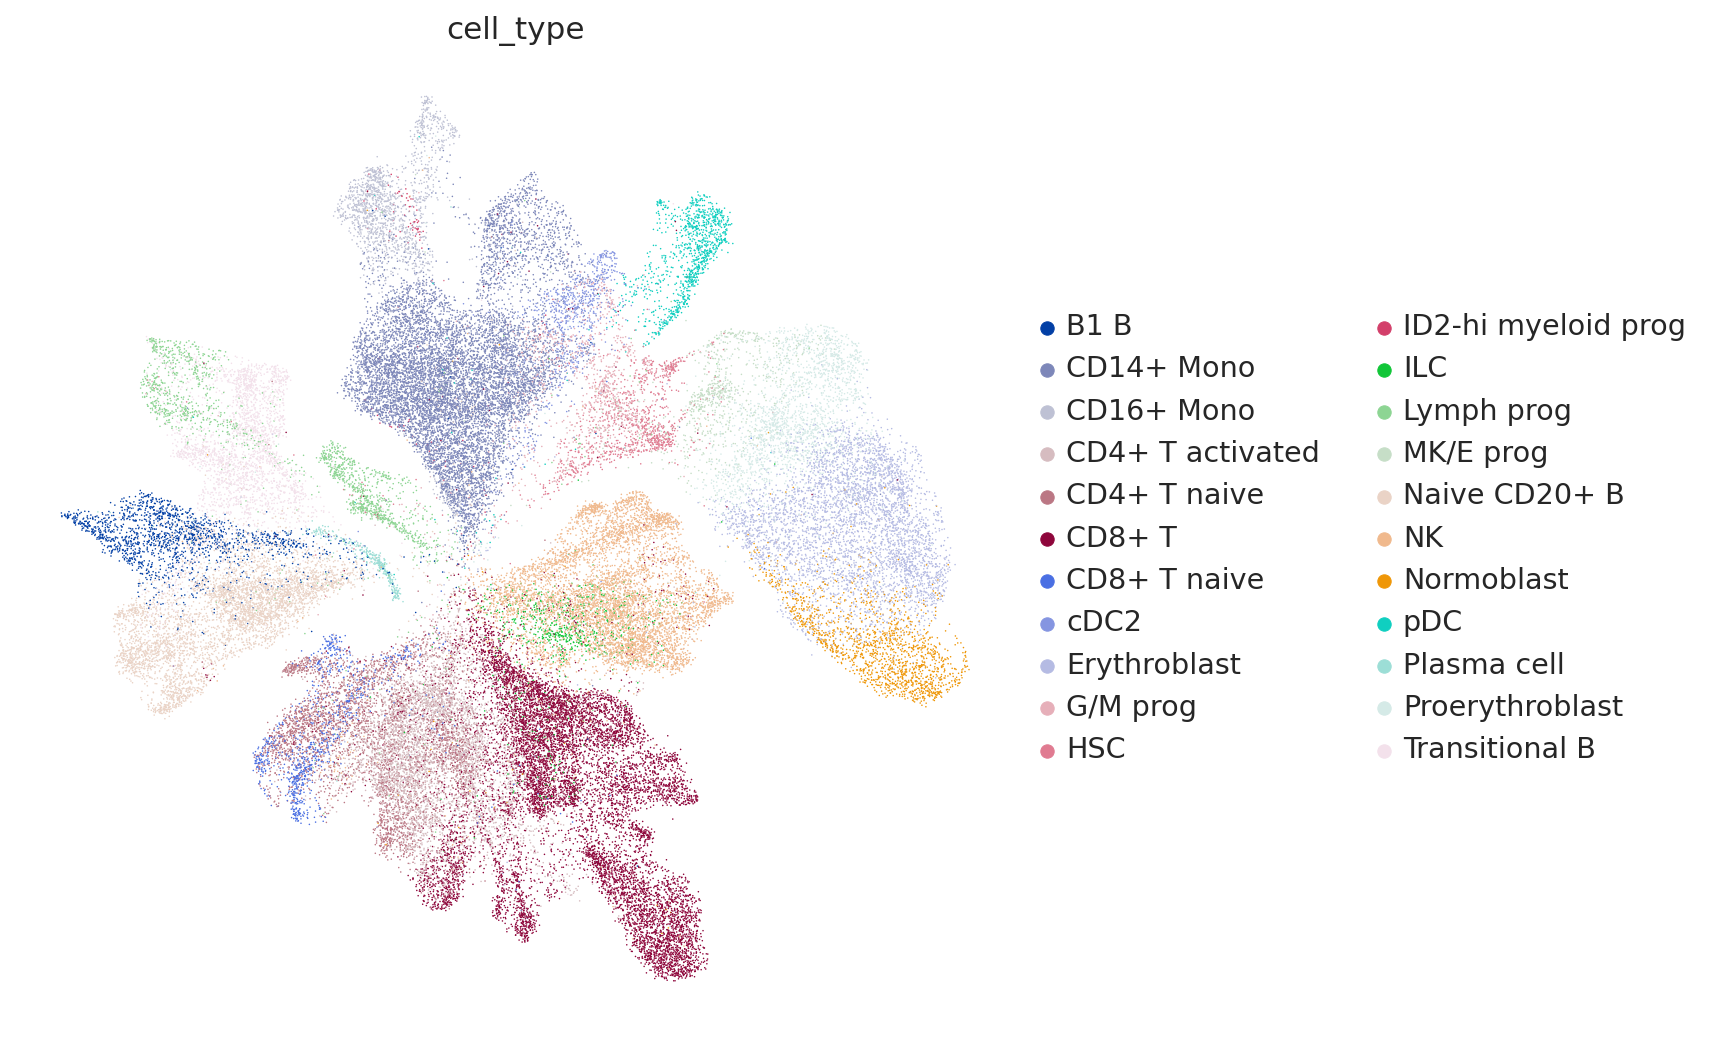

In [82]:
sc.pl.umap(ex.adata, color="cell_type", save=f"{model_type}.png")

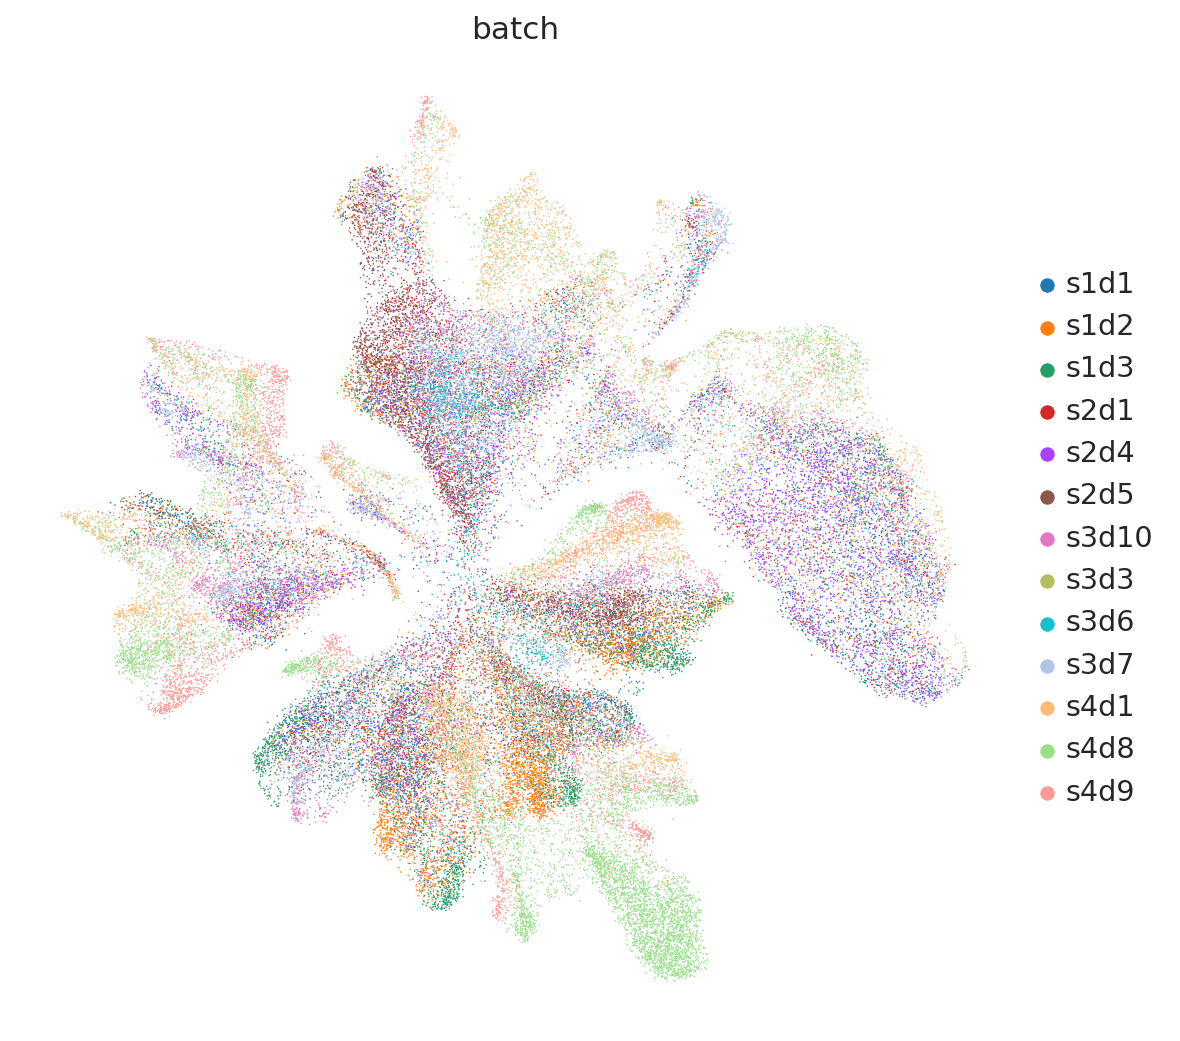

In [83]:
sc.pl.umap(ex.adata, color="batch", save=f"{model_type}_batch.png")

### SCALE model

In [59]:
model_type='scale'
model_hash=results.loc[(dataset_map['neurips'], model_type_map[model_type]), "config_hash"]

In [60]:
model_hash

'61f3e9eed7236cb67452ed7cef030bc3'

In [61]:
ex, model, config = load_experiment(seml_database, model_hash, get_experiment, load_model=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


In [62]:
X_emb = load_embedding(ex)

In [63]:
compute_embedding(ex.adata, X_emb)

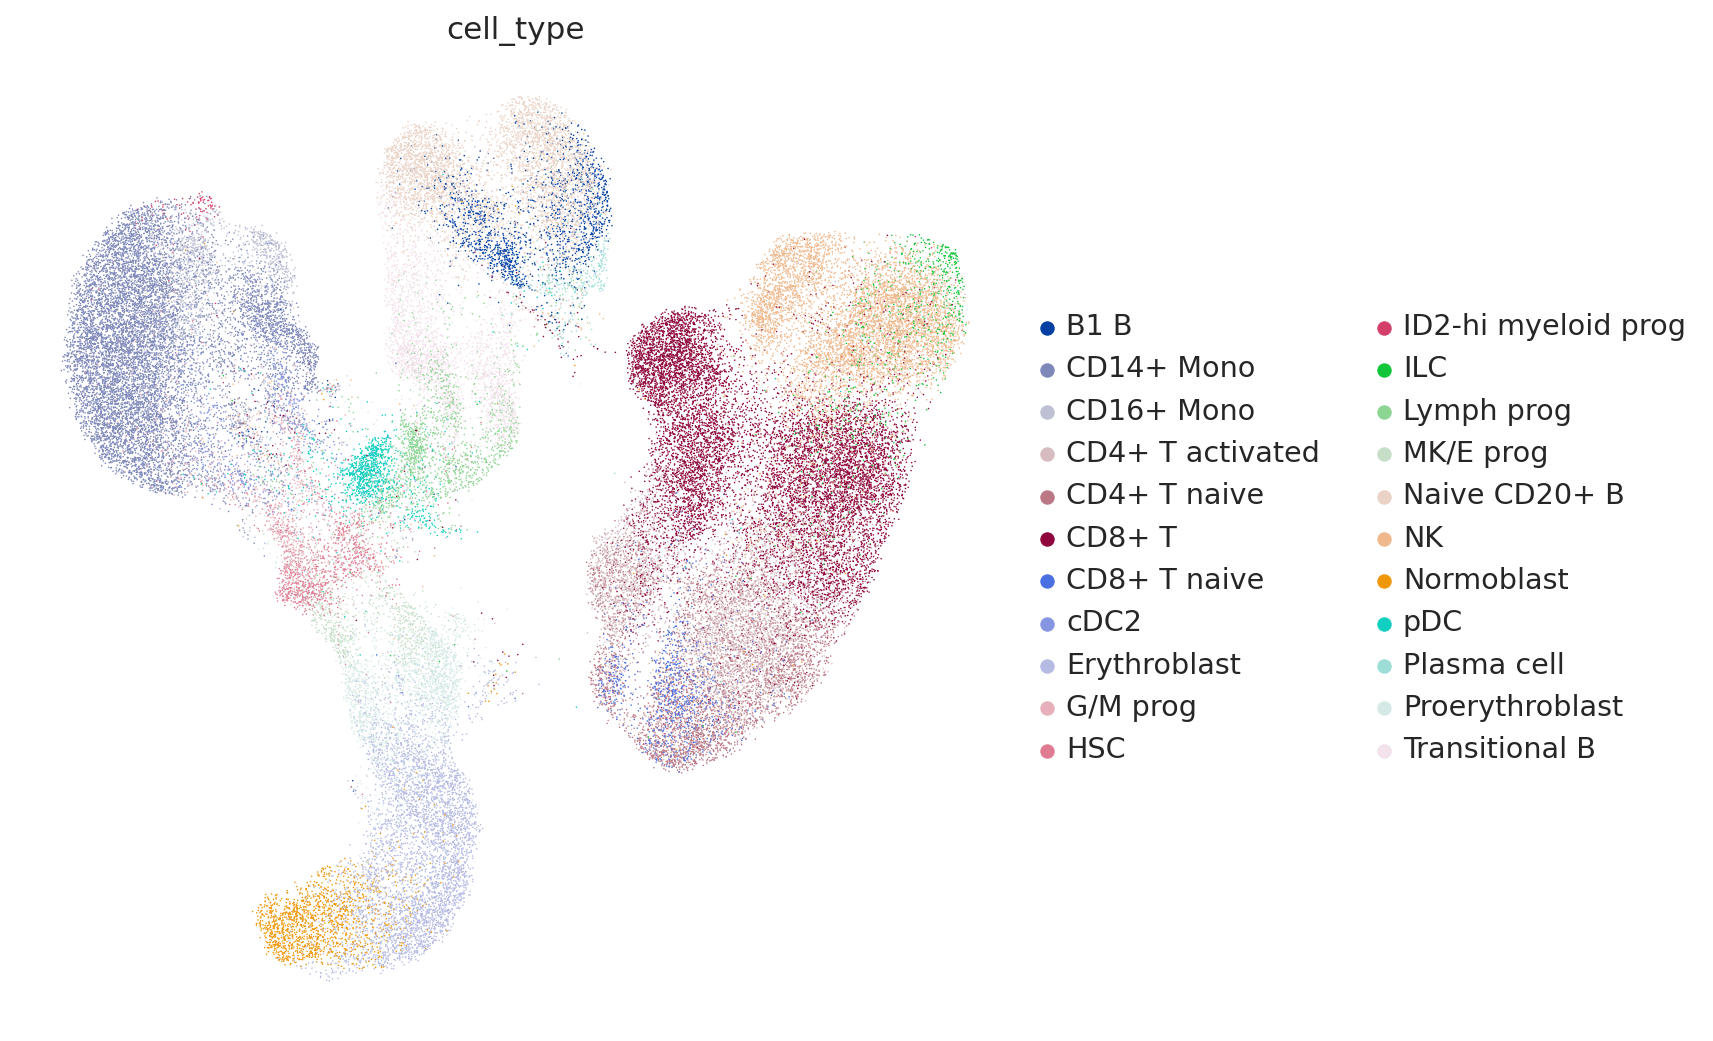

In [67]:
sc.pl.umap(ex.adata, color="cell_type", save=f"{model_type}.png")

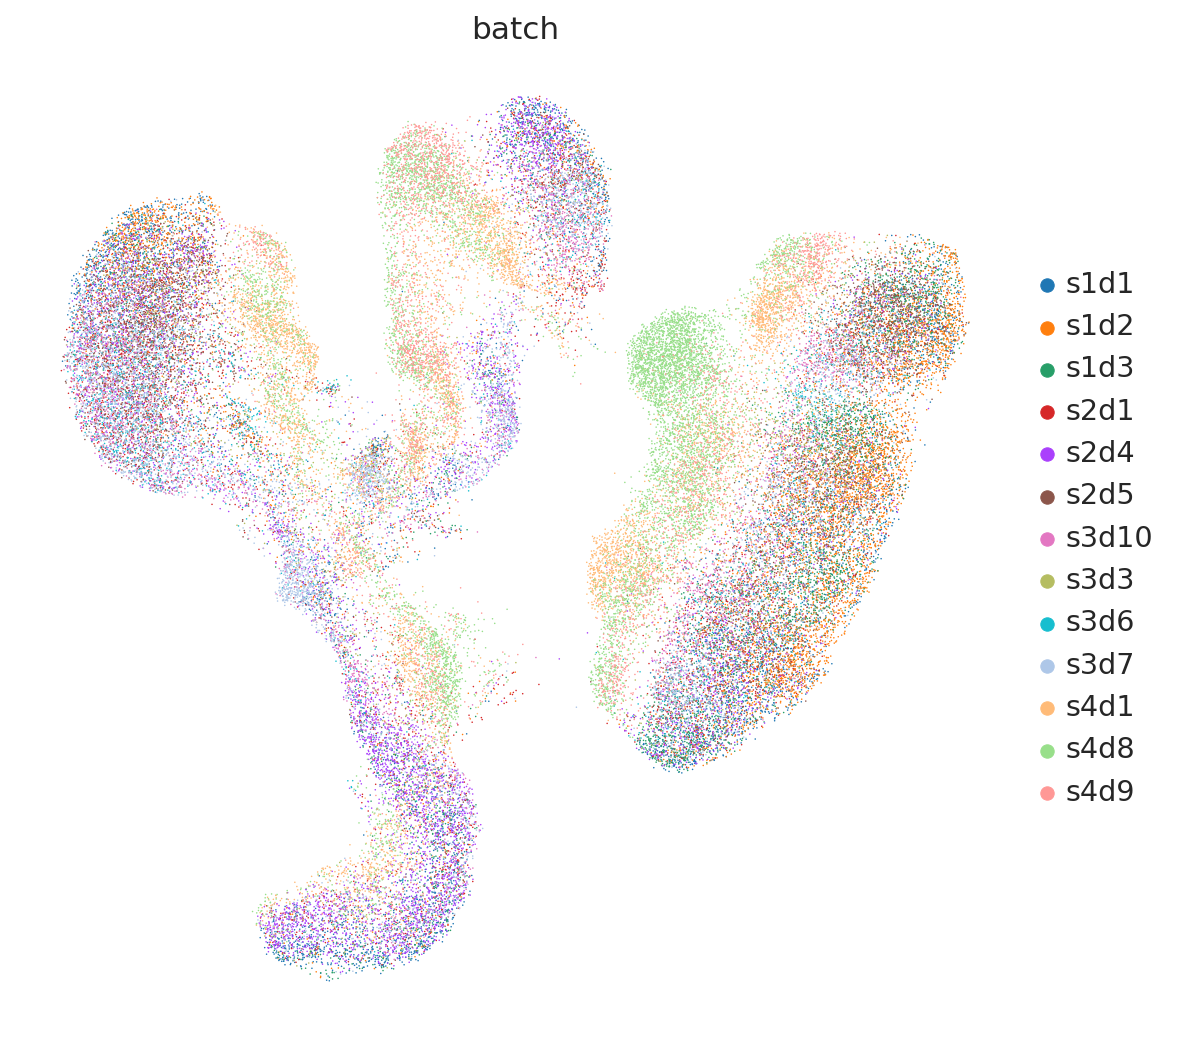

In [68]:
sc.pl.umap(ex.adata, color="batch", save=f"{model_type}_batch.png")